# Final Project Part 3: Technical Notebook
### Develop a prototype model or process to successfully resolve the business problem
_By: Francesco Yuri Tinelli (Washington, D.C.)_

---

### Business Problem

Given the avaiable Human Reousrce (HR) data can we determine which features are significant and will more accruately predict if an employee will leave or stay with the company.

I will use the general human resource data to build a classification model that will classify an employee as either 'staying' or 'leaving' in order to inform/support a company's attrition and retention strategies for their workforce/employees.

### Import libraries and read in data

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in general data/details about the employees.
general_hr = pd.read_csv('./data/general_data.csv')

# Read in survey results pertaining to empolyees' responses on 
# environment, job, and work life balance satisfaction level.
employee_survey = pd.read_csv('./data/employee_survey_data.csv')

### Clean Up Data and Perform Exporatory Data Analysis

In [3]:
# It would be beneficial to merge the two datasets and proceed with exploratory and statistical data analysis.

# Check if 'EmployeeID' is unique/distinct in both datasets to use field for merge.
print(f"General HR data has {general_hr['EmployeeID'].nunique()} distinct employee IDs and \nEmployee survey data has {employee_survey['EmployeeID'].nunique()} distinct employee IDs.")

General HR data has 4410 distinct employee IDs and 
Employee survey data has 4410 distinct employee IDs.


In [4]:
# Merge the two dataset by 'EmployeeID' and using left join and call new data set 'hr'.
hr = pd.merge(general_hr,employee_survey,how='left',on='EmployeeID')

# Check number of rows and columns to confirm proper join.
print(f'New hr data set has {hr.shape[0]} rows and {hr.shape[1]} columns with the following column names:\n {hr.columns}.')

New hr data set has 4410 rows and 27 columns with the following column names:
 Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object').


In [5]:
# Review basic statistics of combined dataset.
hr.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000


Null values for NumsCompaniesWorked, TotalWorkingYears, EnvironmentSatisfaction, JobSatisfaction, WorklifeBalance

In [6]:
# Double-check null fields identified by count in 'hr.describe()'.
hr.isnull().sum()

# Percentage of missing nulls
hr.isnull().mean()

Age                        0.000000
Attrition                  0.000000
BusinessTravel             0.000000
Department                 0.000000
DistanceFromHome           0.000000
Education                  0.000000
EducationField             0.000000
EmployeeCount              0.000000
EmployeeID                 0.000000
Gender                     0.000000
JobLevel                   0.000000
JobRole                    0.000000
MaritalStatus              0.000000
MonthlyIncome              0.000000
NumCompaniesWorked         0.004308
Over18                     0.000000
PercentSalaryHike          0.000000
StandardHours              0.000000
StockOptionLevel           0.000000
TotalWorkingYears          0.002041
TrainingTimesLastYear      0.000000
YearsAtCompany             0.000000
YearsSinceLastPromotion    0.000000
YearsWithCurrManager       0.000000
EnvironmentSatisfaction    0.005669
JobSatisfaction            0.004535
WorkLifeBalance            0.008617
dtype: float64

Even though it is a small percentage of the dataset, it is preferable to keep the data/rows and fill them in.

In [7]:
# Fill in null values with mean of its column.
hr.fillna(value={'NumCompaniesWorked':hr['NumCompaniesWorked'].mean()},inplace=True)
hr.fillna(value={'TotalWorkingYears':hr['TotalWorkingYears'].mean()},inplace=True)

# Fill in null values with median of its column.
hr.fillna(value={'EnvironmentSatisfaction':hr['EnvironmentSatisfaction'].median()},inplace=True)
hr.fillna(value={'JobSatisfaction':hr['JobSatisfaction'].median()},inplace=True)
hr.fillna(value={'WorkLifeBalance':hr['WorkLifeBalance'].median()},inplace=True)

# Confirm no null values.
hr.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [10]:
# Describe of all numeric columns, grouped by attrtion.
pd.set_option('display.max_columns', None)
hr.groupby('Attrition').describe()

Age                                                     \
            count       mean       std   min   25%   50%   75%   max   
Attrition                                                              
No         3699.0  37.561233  8.885956  18.0  31.0  36.0  43.0  60.0   
Yes         711.0  33.607595  9.675693  18.0  28.0  32.0  39.0  58.0   

          DistanceFromHome                                                 \
                     count      mean       std  min  25%  50%   75%   max   
Attrition                                                                   
No                  3699.0  9.227088  8.167978  1.0  2.0  7.0  14.0  29.0   
Yes                  711.0  9.012658  7.772368  1.0  2.0  7.0  15.0  29.0   

          Education                                               \
              count      mean       std  min  25%  50%  75%  max   
Attrition                                                          
No           3699.0  2.919708  1.025784  1.0  2.0  3.0  4.0  5.0   
Yes           711.0  2.877637  1.014233  1.0  2.0  3.0  4.0  5.0   

          EmployeeCount                                    EmployeeID  \
                  count mean  std  min  25%  50%  75%  max      count   
Attrition                                                               
No               3699.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0     3699.0   
Yes               711.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      711.0   

                                                                          \
                  mean          std  min     25%     50%     75%     max   
Attrition                                                                  
No         2208.139497  1273.944391  1.0  1110.5  2213.0  3304.5  4410.0   
Yes        2191.767932  1270.136654  2.0  1072.0  2165.0  3341.0  4403.0   

          EnvironmentSatisfaction                                          \
                            count      mean       std  min  25%  50%  75%   
Attrition                                                                   
No                         3699.0  2.773723  1.068453  1.0  2.0  3.0  4.0   
Yes                         711.0  2.472574  1.163540  1.0  1.0  3.0  4.0   

               JobLevel                                               \
           max    count      mean       std  min  25%  50%  75%  max   
Attrition                                                              
No         4.0   3699.0  2.068938  1.115967  1.0  1.0  2.0  3.0  5.0   
Yes        4.0    711.0  2.037975  1.057485  1.0  1.0  2.0  2.0  5.0   

          JobSatisfaction                                               \
                    count      mean       std  min  25%  50%  75%  max   
Attrition                                                                
No                 3699.0  2.779129  1.088877  1.0  2.0  3.0  4.0  4.0   
Yes                 711.0  2.471167  1.115296  1.0  1.0  3.0  3.0  4.0   

          MonthlyIncome                                                \
                  count          mean           std      min      25%   
Attrition                                                               
No               3699.0  65672.595296  47472.814021  10510.0  29360.0   
Yes               711.0  61682.616034  44792.067695  10090.0  28440.0   

                                      NumCompaniesWorked                      \
               50%      75%       max              count      mean       std   
Attrition                                                                      
No         49300.0  86060.0  199990.0             3699.0  2.648668  2.455544   
Yes        49080.0  71040.0  198590.0              711.0  2.934992  2.671279   

                                   PercentSalaryHike                       \
           min  25%  50%  75%  max             count       mean       std   
Attrition                                                                   
No         0.0  1.0  2.0  4.0  9.0            3699.0  15.157340

In [11]:
# Remove non-essential fields before correlation heatmap.
hr.drop(hr[['EmployeeCount', 'Over18', 'StandardHours']], axis = 1, inplace = True)

In [12]:
# Encode/Convert categorical data

hr['BusinessTravel'] = hr['BusinessTravel'].map({'Travel_Frequently': 2, 'Travel_Rarely': 1, 'Non-Travel': 0})
hr['Department'] =  hr['Department'].map({'Sales': 2, 'Research & Development': 1, 'Human Resources': 0})
hr['EducationField'] = hr['EducationField'].map({'Life Sciences': 5, 'Other': 4, 'Medical': 3, 
                                             'Marketing': 2,'Technical Degree': 1,'Human Resources': 0})
hr['Gender'] = hr['Gender'].map({'Female': 1, 'Male': 0})
hr['JobRole'] = hr['JobRole'].map({'Healthcare Representative': 8, 'Research Scientist': 7, 'Sales Executive': 6, 
                                   'Human Resources': 5,'Research Director': 4,'Laboratory Technician': 3,
                                   'Manufacturing Director': 2,'Sales Representative': 1,'Manager': 0})
hr['MaritalStatus'] =  hr['MaritalStatus'].map({'Married': 2, 'Single': 1, 'Divorced': 0})
hr['Attrition_num'] = hr['Attrition'].map({'Yes': 1, 'No': 0})

# Check the data types
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel               int64
Department                   int64
DistanceFromHome             int64
Education                    int64
EducationField               int64
EmployeeID                   int64
Gender                       int64
JobLevel                     int64
JobRole                      int64
MaritalStatus                int64
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Attrition_num                int64
dtype: object

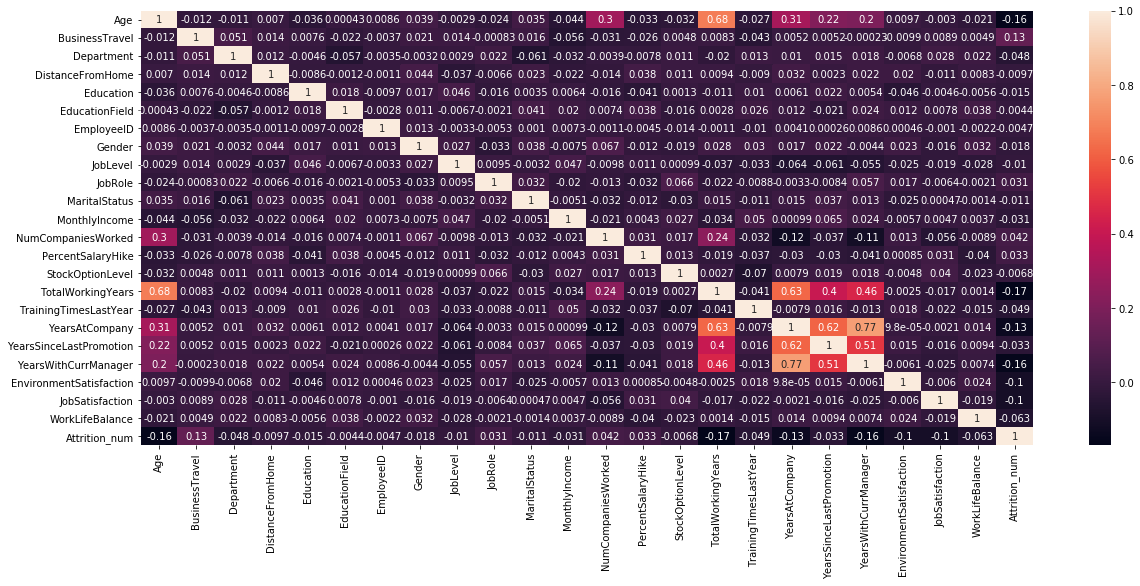

In [13]:
# Create correlation heatmap.
fig = plt.figure(figsize=(20,8))
sns.heatmap(hr.corr(),annot=True)

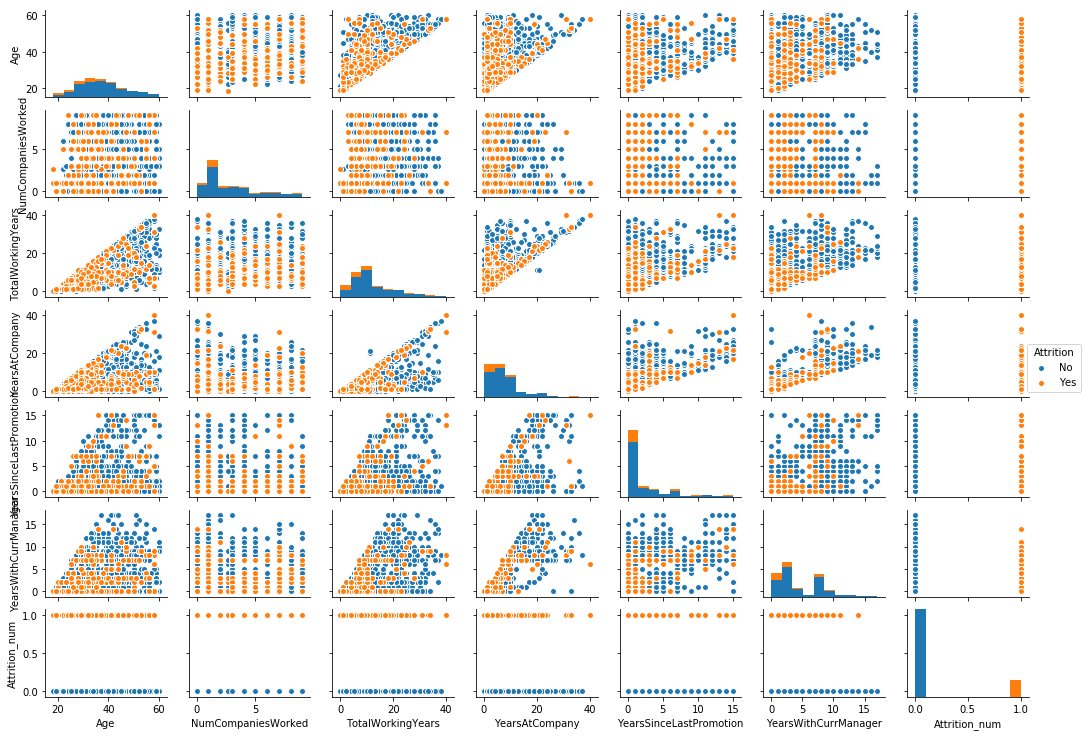

In [15]:
# Look at strong correlations and attrition
g=sns.pairplot(hr[['Age','NumCompaniesWorked','TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion','YearsWithCurrManager','Attrition_num','Attrition']],hue='Attrition')
g.fig.set_figheight(10)
g.fig.set_figwidth(15)

### Random Forest Model Development

### Determine the baseline accuracy and introduce performance metrics

In [18]:
# Calculate the baseline accuracy/Determine the current attrition for company.
hr['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

16% percent of the employees have left the company while 84% have stayed. We can compare our model against those who have stayed (most frequent class) and see if it performs better. But there are other/better performance metrics for classification models.

Following feature selection and model implementation, model performance will be evaluated using a confusion matrix to find the precision and accuracy of the model. 

### Why Random Forest

With a large number of features Random Forest provides a more reliable estimate of feature importance and selection. Also with multiple trees is the model will help reduce overfitting.

In [ ]:
# Create X and y.
feature_cols = ['INDUS','RM','PTRATIO','LSTAT']
X = boston_df[feature_cols]
y = boston.target